# Improt datas and libraries

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.preprocessing import MinMaxScaler
from google.colab import files

uploaded = files.upload()

Saving iris_dataset.csv to iris_dataset (3).csv


In [76]:
df= pd.read_csv('iris_dataset.csv')
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Part2: Select 2 features

In [77]:
wanted_features=df[['sepal length (cm)','sepal width (cm)']]
targets = df['target']

#Part3

In [69]:
P_test = wanted_features.iloc[149]
true_class = targets.iloc[149]
train_features = wanted_features.iloc[:149]
train_targets = targets.iloc[:149]
print(P_test)

sepal length (cm)    5.9
sepal width (cm)     3.0
Name: 149, dtype: float64


#Part 4:

In [54]:
distances = np.linalg.norm(train_features - P_test, ord=2, axis=1)
# distances = np.sqrt(np.sum((train_features - P_test)**2, axis=1))
distances

array([0.94339811, 1.        , 1.21655251, 1.30384048, 1.08166538,
       1.02956301, 1.36014705, 0.98488578, 1.50332964, 1.00498756,
       0.86023253, 1.17046999, 1.1       , 1.6       , 1.00498756,
       1.41421356, 1.02956301, 0.94339811, 0.82462113, 1.13137085,
       0.64031242, 1.06301458, 1.43178211, 0.85440037, 1.17046999,
       0.9       , 0.98488578, 0.86023253, 0.80622577, 1.21655251,
       1.1045361 , 0.64031242, 1.30384048, 1.26491106, 1.00498756,
       0.92195445, 0.64031242, 1.16619038, 1.5       , 0.89442719,
       1.02956301, 1.56524758, 1.5132746 , 1.02956301, 1.13137085,
       1.1       , 1.13137085, 1.31529464, 0.92195445, 0.9486833 ,
       1.11803399, 0.53851648, 1.00498756, 0.80622577, 0.63245553,
       0.28284271, 0.5       , 1.16619038, 0.70710678, 0.76157731,
       1.3453624 , 0.        , 0.80622577, 0.2236068 , 0.31622777,
       0.80622577, 0.3       , 0.31622777, 0.85440037, 0.58309519,
       0.2       , 0.28284271, 0.64031242, 0.28284271, 0.50990

In [74]:
nearest_idx_1 = np.argmin(distances)
print(f"Index {nearest_idx_1}: Sepal Length={features_row['sepal length (cm)']:.2f}, Sepal Width={features_row['sepal width (cm)']:.2f}, Class={class_row}")
pred_class_1 = train_targets.iloc[nearest_idx_1]
correct_1=pred_class_1 == true_class
print(f"the predicted class is: Class ({pred_class_1}) and the true Class is: Class({true_class})")
print(f"So the answer of this part is: {correct_1}")

Index 61: Sepal Length=6.00, Sepal Width=2.90, Class=1
the predicted class is: Class (1) and the true Class is: Class(2)
So the answer of this part is: False


#Part5:

In [63]:
nearest_indices_3 = np.argsort(distances)[:3]
for idx in nearest_indices_3:
    features_row = train_features.iloc[idx]
    class_row = train_targets.iloc[idx]
    print(f"Index {idx}: Sepal Length={features_row['sepal length (cm)']:.2f}, Sepal Width={features_row['sepal width (cm)']:.2f}, Class={class_row}")
print(nearest_indices_3)

Index 61: Sepal Length=5.90, Sepal Width=3.00, Class=1
Index 138: Sepal Length=6.00, Sepal Width=3.00, Class=2
Index 78: Sepal Length=6.00, Sepal Width=2.90, Class=1
[ 61 138  78]


In [72]:
neighbors_classes_3 = train_targets.iloc[nearest_indices_3].values
print(neighbors_classes_3)
counts = np.bincount(neighbors_classes_3.astype(int))
print(counts)
pred_class_3 = np.argmax(counts)
print(pred_class_3)
correct_3 = pred_class_3 == true_class
pred_class_3 == true_class
print(f"the predicted class is: Class ({pred_class_3}) and the true Class is: Class({true_class})")
print(f"So the answer of this part is: {correct_3}")

[1 2 1]
[0 2 1]
1
the predicted class is: Class (1) and the true Class is: Class(2)
So the answer of this part is: False


# Finl Result:

In [52]:
print(f"کلاس واقعی Ptest: {true_class}")
print(f"پیش‌بینی k=1: {pred_class_1} (درست: {correct_1})")
print(f"پیش‌بینی k=3: {pred_class_3} (درست: {correct_3})")

کلاس واقعی Ptest: 2
پیش‌بینی k=1: 1 (درست: False)
پیش‌بینی k=3: 1 (درست: False)


# Show plot

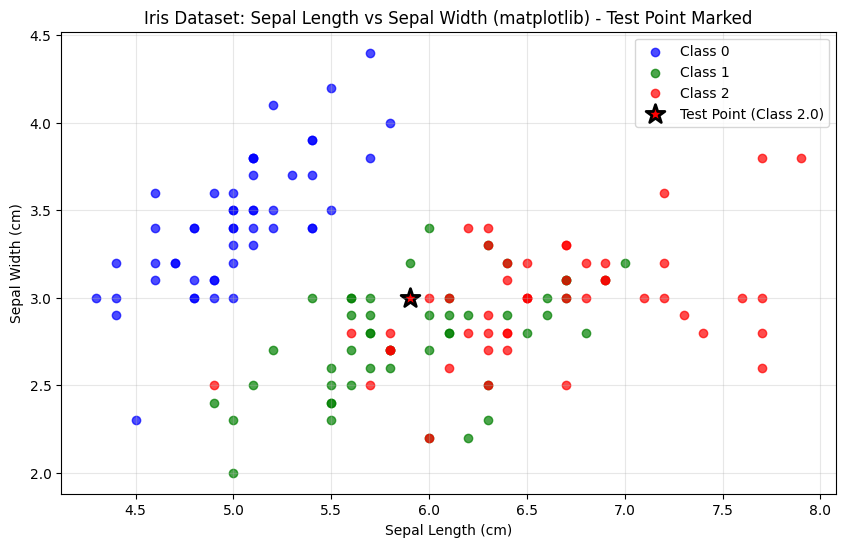

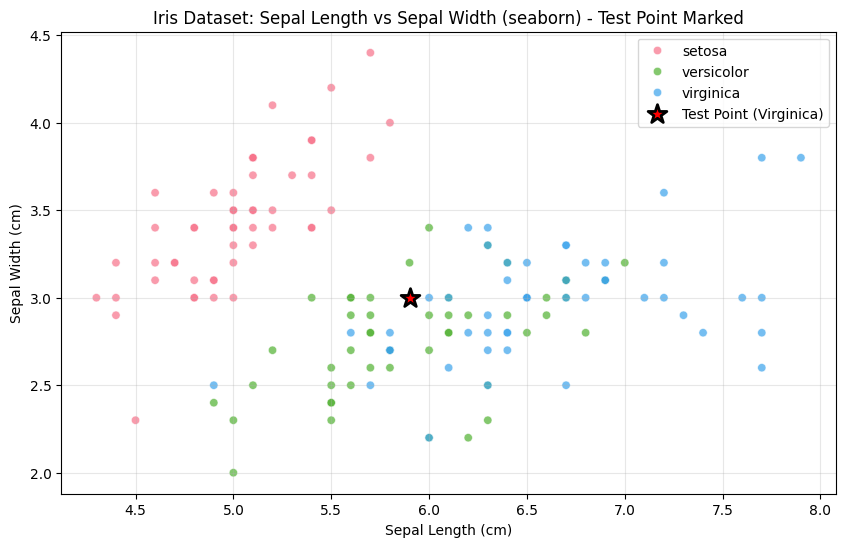

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# لود دیتاست
df = pd.read_csv('iris_dataset.csv')

# انتخاب ویژگی‌ها
features = df[['sepal length (cm)', 'sepal width (cm)']]
targets = df['target']

# رکورد آخر (ایندکس 149)
last_row = df.iloc[149]
ptest_x = last_row['sepal length (cm)']
ptest_y = last_row['sepal width (cm)']
true_class = last_row['target']

# جداسازی داده‌های آموزشی (بدون رکورد آخر)
train_df = df.iloc[:149].copy()
train_df['species'] = train_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# نمودار 1: با matplotlib
plt.figure(figsize=(10, 6))
colors = {0: 'blue', 1: 'green', 2: 'red'}
for class_val in [0, 1, 2]:
    mask = train_df['target'] == class_val
    plt.scatter(train_df[mask]['sepal length (cm)'], train_df[mask]['sepal width (cm)'],
                c=colors[class_val], label=f'Class {class_val}', alpha=0.7)

# علامت‌گذاری رکورد آخر با marker متفاوت (مثل ستاره بزرگ و قرمز)
plt.scatter(ptest_x, ptest_y, c='red', marker='*', s=200, label=f'Test Point (Class {true_class})', edgecolors='black', linewidth=2)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset: Sepal Length vs Sepal Width (matplotlib) - Test Point Marked')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()  # یا plt.savefig('matplotlib_plot.png') برای ذخیره

# نمودار 2: با seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='sepal length (cm)', y='sepal width (cm)', hue='species', palette='husl', alpha=0.7)

# علامت‌گذاری رکورد آخر
sns.scatterplot(x=[ptest_x], y=[ptest_y], color='red', marker='*', s=200,
                label=f'Test Point (Virginica)', edgecolor='black', linewidth=2, zorder=5)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset: Sepal Length vs Sepal Width (seaborn) - Test Point Marked')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()  # یا plt.savefig('seaborn_plot.png') برای ذخیره

# Test with Normal Data

In [80]:
import pandas as pd
import numpy as np

# گام 1: لود دیتاست
df = pd.read_csv('iris_dataset.csv')

# گام 2: انتخاب فقط دو ویژگی Sepal Length و Sepal Width
features = df[['sepal length (cm)', 'sepal width (cm)']]
targets = df['target']

# گام جدید: نرمال‌سازی Min-Max روی features (fit on train, transform both)
# ابتدا train و test را جدا کنیم
train_features = features.iloc[:149].copy()
ptest = features.iloc[149].copy()

# محاسبه min و max از train
min_vals = train_features.min()
max_vals = train_features.max()

# نرمال‌سازی train
train_features_normalized = (train_features - min_vals) / (max_vals - min_vals)

# نرمال‌سازی ptest با همان min/max از train
ptest_normalized = (ptest - min_vals) / (max_vals - min_vals)

# گام 3: جداسازی کلاس‌ها (تغییر نکرده، چون کلاس نرمال‌سازی نمی‌شود)
true_class = targets.iloc[149]  # کلاس واقعی: 2 (virginica)
train_targets = targets.iloc[:149]

# محاسبه فاصله اقلیدسی روی داده‌های نرمال‌شده (با np.linalg.norm)
distances = np.linalg.norm(train_features_normalized - ptest_normalized, ord=2, axis=1)

# گام 4: k=1 - نزدیک‌ترین همسایه
nearest_idx_1 = np.argmin(distances)
pred_class_1 = train_targets.iloc[nearest_idx_1]
correct_1 = pred_class_1 == true_class

# گام 5: k=3 - سه نزدیک‌ترین همسایه و رای اکثریت (با numpy باین‌کاونت)
nearest_indices_3 = np.argsort(distances)[:3]

# نمایش مقادیر هر رکورد (ویژگی‌های اصلی، نه نرمال‌شده، برای خوانایی)
print("Three nearest neighbors (original values):")
for idx in nearest_indices_3:
    features_row = train_features.iloc[idx]  # مقادیر اصلی
    class_row = train_targets.iloc[idx]
    dist_val = distances[idx]  # فاصله نرمال‌شده
    print(f"Index {idx}: Sepal Length={features_row['sepal length (cm)']:.2f}, Sepal Width={features_row['sepal width (cm)']:.2f}, Class={class_row}, Normalized Distance={dist_val:.4f}")

neighbors_classes_3 = train_targets.iloc[nearest_indices_3].values  # به آرایه numpy تبدیل
counts = np.bincount(neighbors_classes_3.astype(int))  # شمارش تکرار هر کلاس
pred_class_3 = np.argmax(counts)  # کلاس با بیشترین تکرار
correct_3 = pred_class_3 == true_class

# چاپ نتایج
print(f"\nکلاس واقعی Ptest: {true_class}")
print(f"پیش‌بینی k=1: {pred_class_1} (درست: {correct_1})")
print(f"پیش‌بینی k=3: {pred_class_3} (درست: {correct_3})")

Three nearest neighbors (original values):
Index 61: Sepal Length=5.90, Sepal Width=3.00, Class=1, Normalized Distance=0.0000
Index 138: Sepal Length=6.00, Sepal Width=3.00, Class=2, Normalized Distance=0.0278
Index 78: Sepal Length=6.00, Sepal Width=2.90, Class=1, Normalized Distance=0.0501

کلاس واقعی Ptest: 2
پیش‌بینی k=1: 1 (درست: False)
پیش‌بینی k=3: 1 (درست: False)
